# C3강현석_빅데이터분석기초 3일차

## 실습 1 : 정규성 검정(Normality Test)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

ds_2sample = pd.read_csv("2sample_t_test.csv")
ds_2sample.head()
ds_2sample.isnull().sum()
#결측 값 제거
data1 = ds_2sample["Mat_A"].dropna()
data2 = ds_2sample["Mat_B"].dropna()

In [2]:
stats.shapiro(data1)
statistic, p = stats.shapiro(data1)
print(f"Shapiro-Wilk Test: statistic={statistic}, p-value={p})")

Shapiro-Wilk Test: statistic=0.906264066696167, p-value=0.2563020884990692)


유의수준을 5%라고 할 때 정규성 검정결과 p-value가 0.05보다 크므로 정규분포이다.

In [3]:
stats.shapiro(data2)
statistic, p = stats.shapiro(data2)
print(f"Shapiro-Wilk Test: statistic={statistic}, p-value={p})")

Shapiro-Wilk Test: statistic=0.9729753732681274, p-value=0.9169775247573853)


유의수준을 5%라고 할 때 정규성 검정결과 p-value가 0.05보다 크므로 정규분포이다.

## 실습 2 : 모평균 구간추정

In [4]:
df = pd.DataFrame({"sample": [18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))
print(f"신뢰구간: ({lower.round(2)},{upper.round(2)})")

신뢰구간: ([17.83],[21.17])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## 실습 3 : 모평균(μ)신뢰구간 추정 - 모표준편차(σ)를 모르는 경우

In [5]:
df = pd.DataFrame({'sample': [73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})

lower, upper = stats.t.interval(0.95, len(df) - 1, loc = np.mean(df), scale = scipy.stats.sem(df))
print(f"신뢰구간: ({lower.round(2)},{upper.round(2)})")

신뢰구간: ([70.6],[72.4])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## 실습 4 : 1-Sample t-test

<Axes: >

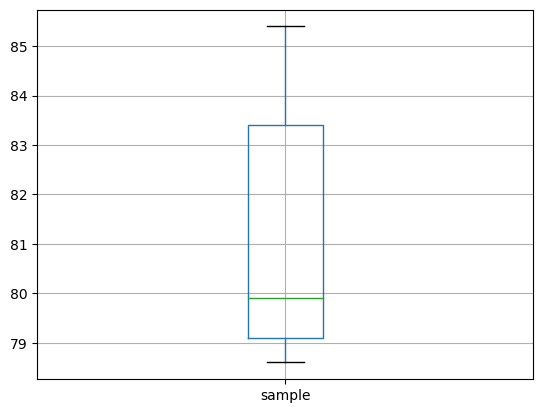

In [6]:
df = pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4,83.4,79.2]})
df.boxplot(['sample'])

In [7]:
statistic, p = stats.shapiro(df['sample'])
print(f"statistic={statistic}, p-value={p})")

statistic=0.8407883644104004, p-value=0.05893223360180855)


In [8]:
t_result = stats.ttest_1samp(df, 78.0)

t, p = t_result.statistic.round(3),\
       t_result.pvalue.round(3)

print("1-Sample t-test")
print(f" t통계량 : {t}")
print(f" p-value : {p}")

1-Sample t-test
 t통계량 : [3.591]
 p-value : [0.007]


## 실습 5 : 2-Sample t-test

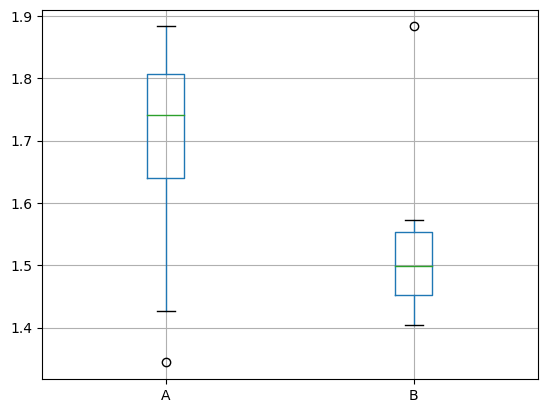

In [9]:
df = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],\
                   'B': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})
df.boxplot(['A','B'])
plt.show()

In [10]:
statistic, p = stats.shapiro(df['A'])
print(f"Shapiro-Wilk Test: statistic={statistic}, p-value={p})")

statistic, p = stats.shapiro(df['B'])
print(f"Shapiro-Wilk Test: statistic={statistic}, p-value={p})")

Shapiro-Wilk Test: statistic=0.8425754904747009, p-value=0.08004532009363174)
Shapiro-Wilk Test: statistic=0.7734811902046204, p-value=0.014793740585446358)


In [11]:
# stats.bartlett(df['A'], df['B'])
print(stats.levene(df['A'], df['B']))

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)


In [12]:
t_result = stats.ttest_ind(df['A'], df['B'])

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print(f" t: [{t}]")
print(f" p: [{p}]")

2-Sample t-test
 t: [1.7]
 p: [0.111]


## 실습 6 : Paired t_test

In [13]:
df1 = pd.DataFrame({'before': [720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after' : [710,580,787,712,750,600,782,670,790,680]})

t_result = stats.ttest_rel(df1, df2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

#paired t-test의 t-값, p값 출력
print("Paired t-test")
print(f" t: {t}")
print(f" p: {p}")

Paired t-test
 t: [-2.266]
 p: [0.05]


## 실습 7 : 1 Proportion test

In [14]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)

print("1 Proportion t-test")
print(f" t: {stat:.3f}")
print(f" p: {pval:.3f}")

1 Proportion t-test
 t: -2.041
 p: 0.041


## 실습 8 : 2 Proportion test

In [15]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, nobs)

print("2 Proportion t-test")
print(f" t: {stat:.3f}")
print(f" p: {pval:.3f}")

2 Proportion t-test
 t: 2.073
 p: 0.038


## 실습 9 : 카이제곱 검정, chi_square test

In [16]:
df = pd.DataFrame({'A': [18, 1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4], 'C': [4, 1, 3, 4, 9, 5, 4],\
       'D': [4, 1, 2, 3, 2, 7, 3], 'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})

chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi-square test")
print(f" chisq: {chi:.3f}")
print(f" p-value: {pval:.3f}")
print(f" degree of freedom: {dof}")
print(" expected value: ")
print(f"{expected.round(3)}")

chi-square test
 chisq: 98.274
 p-value: 0.000
 degree of freedom: 30
 expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


## 실습 10 : ANOVA

### 1. 강종별로 2차정련 시간의 차이

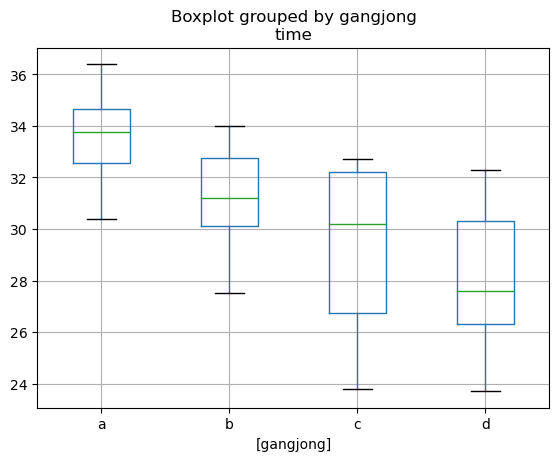

In [17]:
df = pd.read_csv("ANOVA.csv",encoding="euc-kr")

df.boxplot(column='time', by=['gangjong'])
plt.show()

In [32]:
gangjong_mean = df.groupby('gangjong')['time'].mean()
shapiro = df.groupby('gangjong')['time'].apply(stats.shapiro)
print(shapiro)

gangjong
a     (0.9879403114318848, 0.983557939529419)
b    (0.9769707918167114, 0.9355478286743164)
c    (0.8929420113563538, 0.3338908553123474)
d     (0.9713904857635498, 0.901641845703125)
Name: time, dtype: object


In [27]:
gangjong_a_time = df.loc[df['gangjong'] == 'a', 'time']
gangjong_b_time = df.loc[df['gangjong'] == 'b', 'time']
gangjong_c_time = df.loc[df['gangjong'] == 'c', 'time']
gangjong_d_time = df.loc[df['gangjong'] == 'd', 'time']

stats.bartlett(df[df['gangjong']=='a']['time'], 
                df[df['gangjong']=='b']['time'], 
                df[df['gangjong']=='c']['time'],
                df[df['gangjong']=='d']['time'])

LeveneResult(statistic=0.9417495009041227, pvalue=0.4390899931524723)

In [20]:
gangjong_result = stats.f_oneway(gangjong_a_time, gangjong_b_time, gangjong_c_time, gangjong_d_time)

f, p = gangjong_result.statistic.round(3), gangjong_result.pvalue.round(3)

print("One-way ")
print(f" F 통계량 : {f}")
print(f" p-value : {p}")

One-way 
 F 통계량 : 4.172
 p-value : 0.019


### 2. type별로 2차정련 시간의 차이

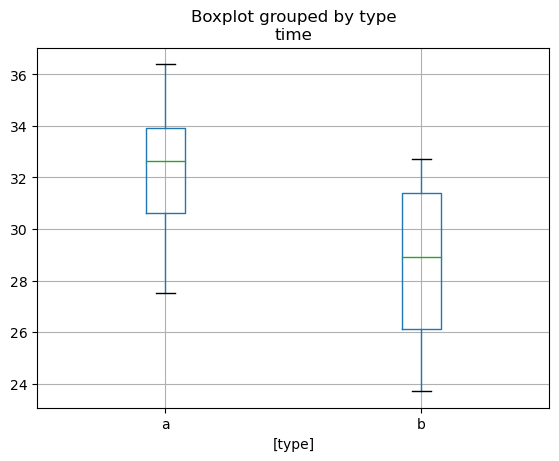

In [21]:
df.boxplot(column='time', by=['type'])
plt.show()

In [33]:
gangjong_mean = df.groupby('type')['time'].mean()
shapiro = df.groupby('type')['time'].apply(stats.shapiro)
print(shapiro)

type
a     (0.982139527797699, 0.9907686114311218)
b    (0.9098271131515503, 0.2122616022825241)
Name: time, dtype: object


In [34]:
type_a_time = df.loc[df['type'] == 'a', 'time']
type_b_time = df.loc[df['type'] == 'b', 'time']


stats.bartlett(df[df['type']=='a']['time'], 
            df[df['type']=='b']['time'])

BartlettResult(statistic=0.9529700642151171, pvalue=0.3289644435379069)

In [35]:
type_result = stats.f_oneway(type_a_time, type_b_time)

f, p = type_result.statistic.round(3), gangjong_result.pvalue.round(3)

print("One-way ")
print(f" F 통계량 : {f}")
print(f" p-value : {p}")

One-way 
 F 통계량 : 9.654
 p-value : 0.019


## 실습 11 : Correlation Analysis

In [25]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1,
       36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 
       14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis ")
print(f" corr: {corr:.3f}")
print(f" p-value: {pval:.3f}")

Correlation Analysis 
 corr: -0.723
 p-value: 0.000
